In [4]:
# Test basic Python
print("Python is working!")

# Check Python version
import sys
print(f"Python version: {sys.version}")

Python is working!
Python version: 3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]


In [5]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm shap imbalanced-learn mlflow fastapi uvicorn streamlit plotly

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
  Using cac

In [6]:
# Verify all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
import lightgbm as lgb

print("✅ All core libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print(f"LightGBM version: {lgb.__version__}")


✅ All core libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5
XGBoost version: 3.1.2
LightGBM version: 4.6.0


In [4]:
# =============================================================================
# FRAUD DETECTION PROJECT - EXPLORATORY DATA ANALYSIS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Libraries loaded successfully!")

# Define data path
DATA_PATH = Path(r"C:\Users\aadik\Desktop\FraudDetection\data")

# Check if files exist
print(f"\n📁 Checking data files...")
print(f"   train_transaction.csv: {(DATA_PATH / 'train_transaction.csv').exists()}")
print(f"   train_identity.csv: {(DATA_PATH / 'train_identity.csv').exists()}")

✅ Libraries loaded successfully!

📁 Checking data files...
   train_transaction.csv: True
   train_identity.csv: True


In [5]:
# =============================================================================
# LOAD THE DATA
# =============================================================================

print("📊 Loading transaction data... (this may take a minute)")
df_transaction = pd.read_csv(DATA_PATH / 'train_transaction.csv')
print(f"   ✅ Transactions loaded: {df_transaction.shape[0]:,} rows, {df_transaction.shape[1]} columns")

print("\n📊 Loading identity data...")
df_identity = pd.read_csv(DATA_PATH / 'train_identity.csv')
print(f"   ✅ Identity loaded: {df_identity.shape[0]:,} rows, {df_identity.shape[1]} columns")

# Quick memory check
transaction_mem = df_transaction.memory_usage(deep=True).sum() / 1024**2
identity_mem = df_identity.memory_usage(deep=True).sum() / 1024**2
print(f"\n💾 Memory usage:")
print(f"   Transactions: {transaction_mem:.1f} MB")
print(f"   Identity: {identity_mem:.1f} MB")

📊 Loading transaction data... (this may take a minute)
   ✅ Transactions loaded: 590,540 rows, 394 columns

📊 Loading identity data...
   ✅ Identity loaded: 144,233 rows, 41 columns

💾 Memory usage:
   Transactions: 2100.7 MB
   Identity: 157.6 MB


🎯 TARGET VARIABLE: isFraud

📊 Distribution:
   Legitimate (0): 569,877 transactions (96.50%)
   Fraudulent (1): 20,663 transactions (3.50%)

⚠️  Class Imbalance Ratio: 27.6 : 1
   (For every 1 fraud, there are 28 legitimate transactions)


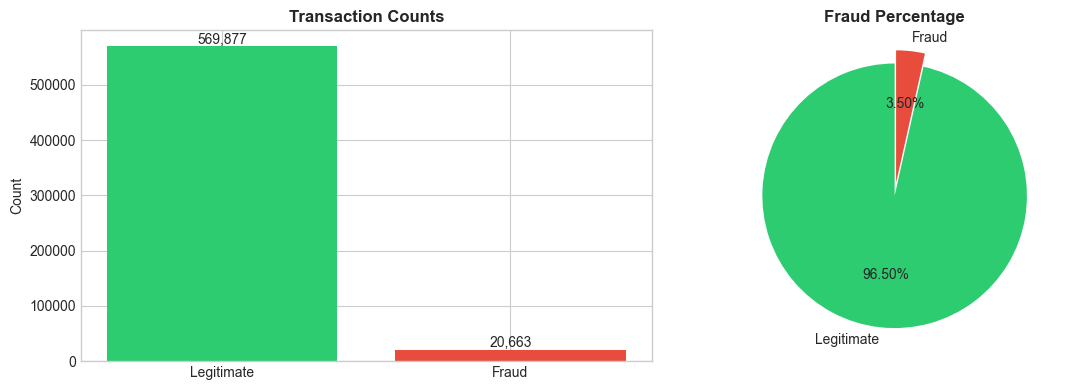


💡 KEY INSIGHT: This is a highly imbalanced dataset!
   - Accuracy is USELESS here (predicting all 0s = 96.5% accurate)
   - We need Precision, Recall, PR-AUC as our metrics


In [3]:
# =============================================================================
# TARGET VARIABLE ANALYSIS - THE FRAUD RATE
# =============================================================================

print("=" * 60)
print("🎯 TARGET VARIABLE: isFraud")
print("=" * 60)

# Fraud distribution
fraud_counts = df_transaction['isFraud'].value_counts()
fraud_pct = df_transaction['isFraud'].value_counts(normalize=True) * 100

print(f"\n📊 Distribution:")
print(f"   Legitimate (0): {fraud_counts[0]:,} transactions ({fraud_pct[0]:.2f}%)")
print(f"   Fraudulent (1): {fraud_counts[1]:,} transactions ({fraud_pct[1]:.2f}%)")

print(f"\n⚠️  Class Imbalance Ratio: {fraud_counts[0] / fraud_counts[1]:.1f} : 1")
print(f"   (For every 1 fraud, there are {fraud_counts[0] / fraud_counts[1]:.0f} legitimate transactions)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Legitimate', 'Fraud'], fraud_counts.values, color=colors)
axes[0].set_title('Transaction Counts', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontsize=10)

# Percentage plot
axes[1].pie(fraud_pct.values, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%', 
            colors=colors, explode=[0, 0.1], startangle=90)
axes[1].set_title('Fraud Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("💡 KEY INSIGHT: This is a highly imbalanced dataset!")
print("   - Accuracy is USELESS here (predicting all 0s = 96.5% accurate)")
print("   - We need Precision, Recall, PR-AUC as our metrics")
print("=" * 60)

💰 TRANSACTION AMOUNT ANALYSIS

📊 Transaction Amount Statistics:

   Metric                    Legitimate           Fraud
   --------------------------------------------------
   Mean                 $        134.51 $        149.24
   Median               $         68.50 $         75.00
   Std Dev              $        239.40 $        232.21
   Min                  $          0.25 $          0.29
   Max                  $     31,937.39 $      5,191.00


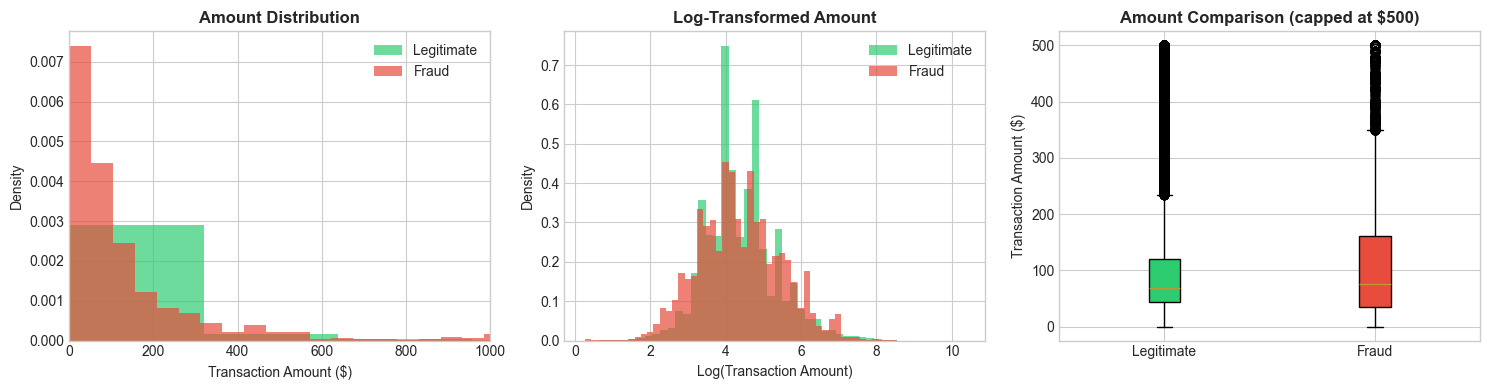


💡 KEY INSIGHT:
   Fraudulent transactions are on average HIGHER ($149.24 vs $134.51)


In [4]:
# =============================================================================
# TRANSACTION AMOUNT ANALYSIS
# =============================================================================

print("=" * 60)
print("💰 TRANSACTION AMOUNT ANALYSIS")
print("=" * 60)

# Separate fraud and legitimate
legit = df_transaction[df_transaction['isFraud'] == 0]['TransactionAmt']
fraud = df_transaction[df_transaction['isFraud'] == 1]['TransactionAmt']

# Statistics
print("\n📊 Transaction Amount Statistics:")
print(f"\n   {'Metric':<20} {'Legitimate':>15} {'Fraud':>15}")
print(f"   {'-'*50}")
print(f"   {'Mean':<20} ${legit.mean():>14,.2f} ${fraud.mean():>14,.2f}")
print(f"   {'Median':<20} ${legit.median():>14,.2f} ${fraud.median():>14,.2f}")
print(f"   {'Std Dev':<20} ${legit.std():>14,.2f} ${fraud.std():>14,.2f}")
print(f"   {'Min':<20} ${legit.min():>14,.2f} ${fraud.min():>14,.2f}")
print(f"   {'Max':<20} ${legit.max():>14,.2f} ${fraud.max():>14,.2f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Distribution (log scale for better visualization)
axes[0].hist(legit, bins=100, alpha=0.7, label='Legitimate', color='#2ecc71', density=True)
axes[0].hist(fraud, bins=100, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
axes[0].set_xlabel('Transaction Amount ($)')
axes[0].set_ylabel('Density')
axes[0].set_title('Amount Distribution', fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, 1000)  # Focus on common range

# Log-transformed distribution
axes[1].hist(np.log1p(legit), bins=50, alpha=0.7, label='Legitimate', color='#2ecc71', density=True)
axes[1].hist(np.log1p(fraud), bins=50, alpha=0.7, label='Fraud', color='#e74c3c', density=True)
axes[1].set_xlabel('Log(Transaction Amount)')
axes[1].set_ylabel('Density')
axes[1].set_title('Log-Transformed Amount', fontweight='bold')
axes[1].legend()

# Box plot comparison
box_data = [legit.clip(upper=500), fraud.clip(upper=500)]
bp = axes[2].boxplot(box_data, labels=['Legitimate', 'Fraud'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
axes[2].set_ylabel('Transaction Amount ($)')
axes[2].set_title('Amount Comparison (capped at $500)', fontweight='bold')

plt.tight_layout()
plt.show()

# Key insight
print("\n💡 KEY INSIGHT:")
if fraud.mean() > legit.mean():
    print(f"   Fraudulent transactions are on average HIGHER (${fraud.mean():.2f} vs ${legit.mean():.2f})")
else:
    print(f"   Fraudulent transactions are on average LOWER (${fraud.mean():.2f} vs ${legit.mean():.2f})")

🕐 TIME PATTERN ANALYSIS (IMPROVED)


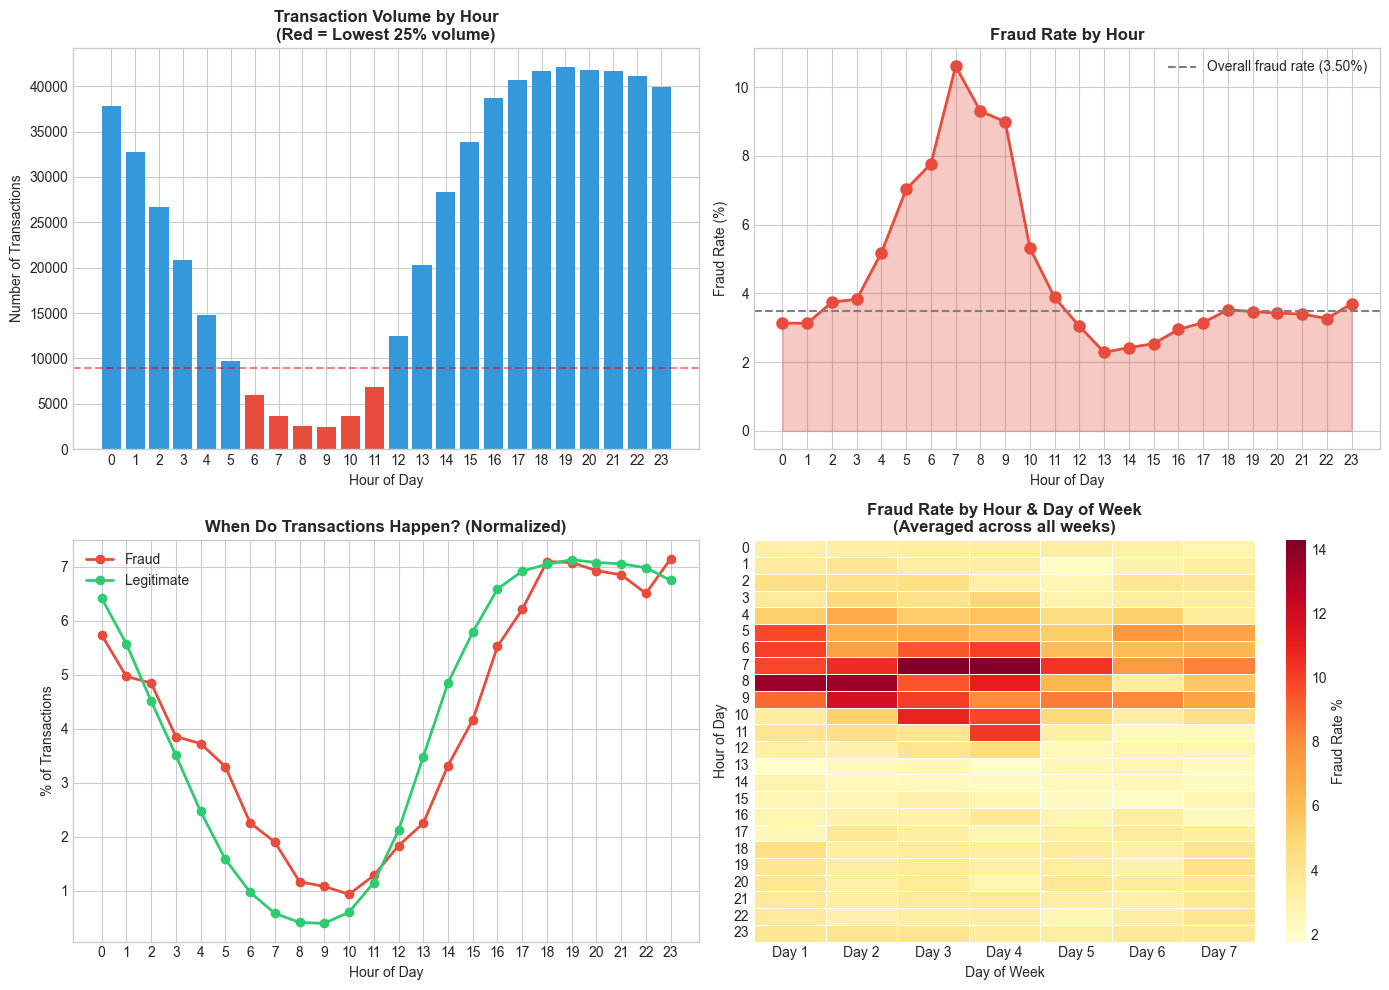


📊 VOLUME & FRAUD RATE BY HOUR:

   Hour     Transactions   Fraud Rate   Risk Level
   ----------------------------------------------
   0              37,795        3.14%        🟢 LOW
   1              32,797        3.13%        🟢 LOW
   2              26,732        3.75%        🟢 LOW
   3              20,802        3.83%        🟢 LOW
   4              14,839        5.19%     🟡 MEDIUM
   5               9,701        7.03%       🔴 HIGH
   6               6,007        7.77%       🔴 HIGH
   7               3,704       10.61%       🔴 HIGH
   8               2,591        9.30%       🔴 HIGH
   9               2,479        9.00%       🔴 HIGH
   10              3,627        5.32%     🟡 MEDIUM
   11              6,827        3.88%        🟢 LOW
   12             12,451        3.04%        🟢 LOW
   13             20,315        2.29%        🟢 LOW
   14             28,328        2.42%        🟢 LOW
   15             33,859        2.54%        🟢 LOW
   16             38,698        2.95%        🟢 LOW

In [7]:

# =============================================================================
# TIME PATTERN ANALYSIS - IMPROVED VERSION
# =============================================================================

print("=" * 60)
print("🕐 TIME PATTERN ANALYSIS (IMPROVED)")
print("=" * 60)

# Fraud rate by hour (already calculated)
hourly_fraud = df_transaction.groupby('hour').agg(
    total_transactions=('isFraud', 'count'),
    fraud_count=('isFraud', 'sum')
).reset_index()
hourly_fraud['fraud_rate'] = (hourly_fraud['fraud_count'] / hourly_fraud['total_transactions']) * 100

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Transaction volume by hour - COLOR BASED ON ACTUAL VOLUME
# Red for lowest volume hours, blue for normal
volume_threshold = hourly_fraud['total_transactions'].quantile(0.25)  # Bottom 25%
colors_hour = ['#e74c3c' if vol < volume_threshold else '#3498db' 
               for vol in hourly_fraud['total_transactions']]

axes[0,0].bar(hourly_fraud['hour'], hourly_fraud['total_transactions'], color=colors_hour)
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Number of Transactions')
axes[0,0].set_title('Transaction Volume by Hour\n(Red = Lowest 25% volume)', fontweight='bold')
axes[0,0].set_xticks(range(0, 24))
axes[0,0].axhline(y=volume_threshold, color='red', linestyle='--', alpha=0.5)

# Plot 2: Fraud rate by hour (same as before - this was good)
axes[0,1].plot(hourly_fraud['hour'], hourly_fraud['fraud_rate'], 'o-', color='#e74c3c', linewidth=2, markersize=8)
axes[0,1].axhline(y=df_transaction['isFraud'].mean()*100, color='gray', linestyle='--', 
                   label=f'Overall fraud rate ({df_transaction["isFraud"].mean()*100:.2f}%)')
axes[0,1].fill_between(hourly_fraud['hour'], hourly_fraud['fraud_rate'], alpha=0.3, color='#e74c3c')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Fraud Rate (%)')
axes[0,1].set_title('Fraud Rate by Hour', fontweight='bold')
axes[0,1].set_xticks(range(0, 24))
axes[0,1].legend()

# Plot 3: Normalized distribution (same as before - this was good)
fraud_by_hour = df_transaction[df_transaction['isFraud']==1].groupby('hour').size()
legit_by_hour = df_transaction[df_transaction['isFraud']==0].groupby('hour').size()
fraud_by_hour_norm = fraud_by_hour / fraud_by_hour.sum() * 100
legit_by_hour_norm = legit_by_hour / legit_by_hour.sum() * 100

axes[1,0].plot(fraud_by_hour_norm.index, fraud_by_hour_norm.values, 'o-', label='Fraud', color='#e74c3c', linewidth=2)
axes[1,0].plot(legit_by_hour_norm.index, legit_by_hour_norm.values, 'o-', label='Legitimate', color='#2ecc71', linewidth=2)
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('% of Transactions')
axes[1,0].set_title('When Do Transactions Happen? (Normalized)', fontweight='bold')
axes[1,0].legend()
axes[1,0].set_xticks(range(0, 24))

# Plot 4: IMPROVED HEATMAP - Averaged by day of week instead of individual days
# Create day of week (0=first day type, repeating weekly)
df_transaction['day_of_week'] = df_transaction['day'] % 7

# Calculate average fraud rate for each hour-dayofweek combination
heatmap_data = df_transaction.groupby(['day_of_week', 'hour']).agg(
    fraud_rate=('isFraud', 'mean'),
    transaction_count=('isFraud', 'count')
).reset_index()

# Only include cells with enough transactions (at least 100) to avoid noise
heatmap_data.loc[heatmap_data['transaction_count'] < 100, 'fraud_rate'] = np.nan

# Pivot for heatmap
pivot_fraud = heatmap_data.pivot(index='hour', columns='day_of_week', values='fraud_rate')
pivot_fraud.columns = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']

sns.heatmap(pivot_fraud * 100, cmap='YlOrRd', ax=axes[1,1], 
            cbar_kws={'label': 'Fraud Rate %'}, annot=False, 
            linewidths=0.5, linecolor='white')
axes[1,1].set_title('Fraud Rate by Hour & Day of Week\n(Averaged across all weeks)', fontweight='bold')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Hour of Day')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n📊 VOLUME & FRAUD RATE BY HOUR:")
print(f"\n   {'Hour':<6} {'Transactions':>14} {'Fraud Rate':>12} {'Risk Level':>12}")
print(f"   {'-'*46}")

for _, row in hourly_fraud.iterrows():
    hour = int(row['hour'])
    trans = int(row['total_transactions'])
    rate = row['fraud_rate']
    
    if rate > 7:
        risk = "🔴 HIGH"
    elif rate > 4:
        risk = "🟡 MEDIUM"
    else:
        risk = "🟢 LOW"
    
    print(f"   {hour:<6} {trans:>14,} {rate:>11.2f}% {risk:>12}")

# Key insights
print("\n" + "=" * 60)
print("💡 KEY INSIGHTS:")
print("=" * 60)
high_risk_hours = hourly_fraud[hourly_fraud['fraud_rate'] > 7]['hour'].tolist()
low_volume_hours = hourly_fraud[hourly_fraud['total_transactions'] < volume_threshold]['hour'].tolist()

print(f"\n   🔴 HIGH RISK hours (>7% fraud): {high_risk_hours}")
print(f"   📉 LOW VOLUME hours: {low_volume_hours}")
print(f"\n   ⚠️  Notice: High risk hours overlap with low volume hours!")
print(f"      This means: Few transactions + High fraud rate = Prime fraud time")

💳 CARD & PRODUCT ANALYSIS (IMPROVED)


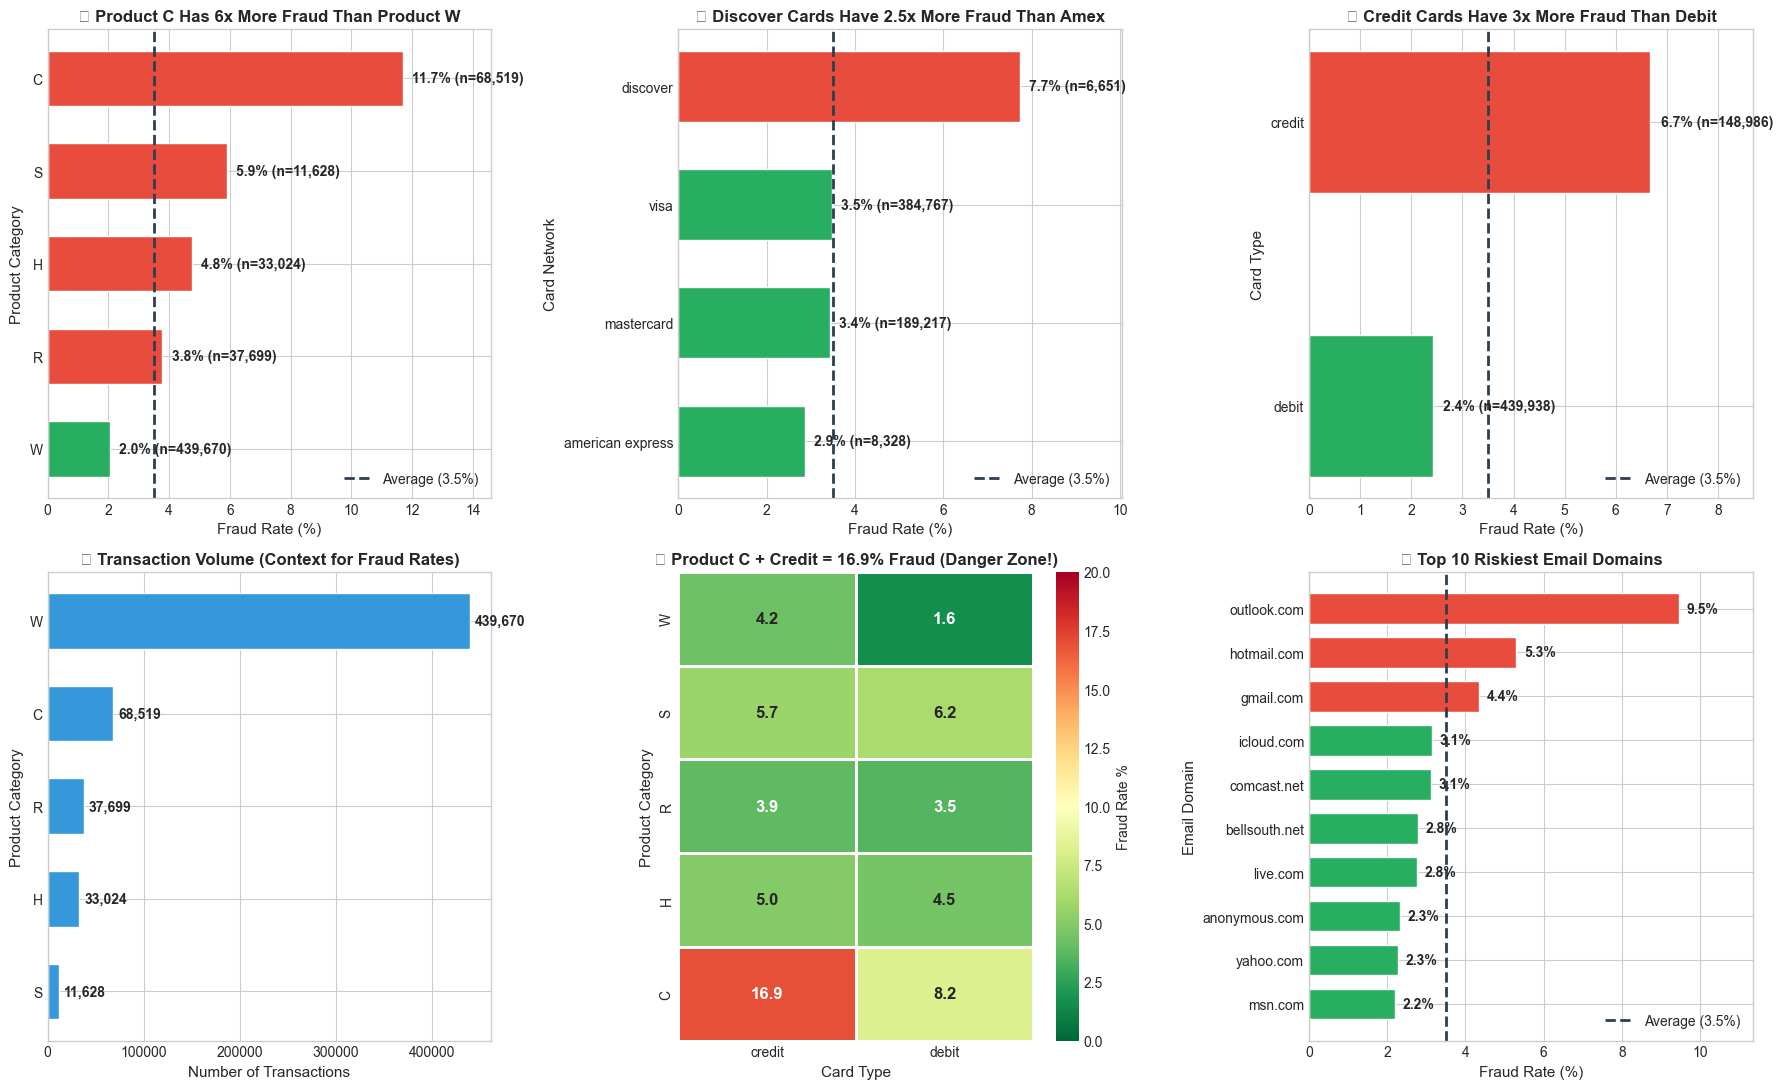


📊 KEY FINDINGS SUMMARY

🏷️ PRODUCT CATEGORIES:
   Product C: 11.7% fraud (68,519 transactions) 🔴 HIGH
   Product S: 5.9% fraud (11,628 transactions) 🔴 HIGH
   Product H: 4.8% fraud (33,024 transactions) 🟡 MEDIUM
   Product R: 3.8% fraud (37,699 transactions) 🟡 MEDIUM
   Product W: 2.0% fraud (439,670 transactions) 🟢 LOW

💳 CARD NETWORKS:
   discover: 7.7% fraud (6,651 transactions) 🔴 HIGH
   visa: 3.5% fraud (384,767 transactions) 🟢 LOW
   mastercard: 3.4% fraud (189,217 transactions) 🟢 LOW
   american express: 2.9% fraud (8,328 transactions) 🟢 LOW

💡 ACTIONABLE INSIGHTS:
   1. Product C + Credit Card = 16.9% fraud → Flag for extra verification
   2. Discover cards have 2.5x more fraud than American Express
   3. Credit cards are 3x riskier than Debit cards
   4. Outlook/Hotmail emails have higher fraud rates than Gmail

   These patterns will be powerful features for our ML model!


In [6]:
# =============================================================================
# CARD & PRODUCT ANALYSIS
# =============================================================================

print("=" * 60)
print("💳 CARD & PRODUCT ANALYSIS (IMPROVED)")
print("=" * 60)

# Calculate all the fraud rates first
# -----------------------------------------------------------------------------

# Product Category
product_fraud = df_transaction.groupby('ProductCD').agg(
    total=('isFraud', 'count'),
    frauds=('isFraud', 'sum')
).reset_index()
product_fraud['fraud_rate'] = (product_fraud['frauds'] / product_fraud['total']) * 100
product_fraud = product_fraud.sort_values('fraud_rate', ascending=True)

# Card Network (card4)
card4_fraud = df_transaction.groupby('card4').agg(
    total=('isFraud', 'count'),
    frauds=('isFraud', 'sum')
).reset_index()
card4_fraud['fraud_rate'] = (card4_fraud['frauds'] / card4_fraud['total']) * 100
card4_fraud = card4_fraud.sort_values('fraud_rate', ascending=True)

# Card Type (card6)
card6_fraud = df_transaction.groupby('card6').agg(
    total=('isFraud', 'count'),
    frauds=('isFraud', 'sum')
).reset_index()
card6_fraud['fraud_rate'] = (card6_fraud['frauds'] / card6_fraud['total']) * 100
card6_fraud = card6_fraud.sort_values('fraud_rate', ascending=True)

# Email domains (filter for 1000+ transactions)
email_fraud = df_transaction.groupby('P_emaildomain').agg(
    total=('isFraud', 'count'),
    frauds=('isFraud', 'sum')
).reset_index()
email_fraud['fraud_rate'] = (email_fraud['frauds'] / email_fraud['total']) * 100
email_fraud = email_fraud[email_fraud['total'] >= 1000]
email_fraud_top = email_fraud.nlargest(10, 'fraud_rate').sort_values('fraud_rate', ascending=True)

# Product x Card combination
combo_fraud = df_transaction.groupby(['ProductCD', 'card6']).agg(
    fraud_rate=('isFraud', 'mean'),
    count=('isFraud', 'count')
).reset_index()
combo_fraud = combo_fraud[combo_fraud['count'] >= 500]
combo_pivot = combo_fraud.pivot(index='ProductCD', columns='card6', values='fraud_rate')

# Overall average for reference
overall_avg = df_transaction['isFraud'].mean() * 100

# -----------------------------------------------------------------------------
# CREATE VISUALIZATIONS
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 3, figsize=(18, 11))

# Color function - green if below average, red if above
def get_colors(rates, threshold=3.5):
    return ['#27ae60' if rate < threshold else '#e74c3c' for rate in rates]

# -----------------------------------------------------------------------------
# CHART 1: Product Category (Top Left)
# -----------------------------------------------------------------------------
colors = get_colors(product_fraud['fraud_rate'])
bars = axes[0,0].barh(product_fraud['ProductCD'], product_fraud['fraud_rate'], color=colors, edgecolor='white', height=0.6)
axes[0,0].axvline(x=overall_avg, color='#2c3e50', linestyle='--', linewidth=2, label=f'Average ({overall_avg:.1f}%)')
axes[0,0].set_xlabel('Fraud Rate (%)', fontsize=11)
axes[0,0].set_ylabel('Product Category', fontsize=11)
axes[0,0].set_title('🔴 Product C Has 6x More Fraud Than Product W', fontsize=12, fontweight='bold')
axes[0,0].legend(loc='lower right')
axes[0,0].set_xlim(0, max(product_fraud['fraud_rate']) * 1.25)

# Add labels with sample size
for bar, (_, row) in zip(bars, product_fraud.iterrows()):
    width = bar.get_width()
    axes[0,0].text(width + 0.3, bar.get_y() + bar.get_height()/2, 
                   f"{row['fraud_rate']:.1f}% (n={int(row['total']):,})", 
                   va='center', fontsize=10, fontweight='bold')

# -----------------------------------------------------------------------------
# CHART 2: Card Network (Top Middle)
# -----------------------------------------------------------------------------
colors = get_colors(card4_fraud['fraud_rate'])
bars = axes[0,1].barh(card4_fraud['card4'].fillna('Unknown'), card4_fraud['fraud_rate'], color=colors, edgecolor='white', height=0.6)
axes[0,1].axvline(x=overall_avg, color='#2c3e50', linestyle='--', linewidth=2, label=f'Average ({overall_avg:.1f}%)')
axes[0,1].set_xlabel('Fraud Rate (%)', fontsize=11)
axes[0,1].set_ylabel('Card Network', fontsize=11)
axes[0,1].set_title('🔴 Discover Cards Have 2.5x More Fraud Than Amex', fontsize=12, fontweight='bold')
axes[0,1].legend(loc='lower right')
axes[0,1].set_xlim(0, max(card4_fraud['fraud_rate']) * 1.3)

for bar, (_, row) in zip(bars, card4_fraud.iterrows()):
    width = bar.get_width()
    axes[0,1].text(width + 0.2, bar.get_y() + bar.get_height()/2, 
                   f"{row['fraud_rate']:.1f}% (n={int(row['total']):,})", 
                   va='center', fontsize=10, fontweight='bold')

# -----------------------------------------------------------------------------
# CHART 3: Card Type - Credit vs Debit (Top Right)
# -----------------------------------------------------------------------------
# Filter out types with very few transactions
card6_fraud_filtered = card6_fraud[card6_fraud['total'] >= 1000].copy()
colors = get_colors(card6_fraud_filtered['fraud_rate'])
bars = axes[0,2].barh(card6_fraud_filtered['card6'].fillna('Unknown'), card6_fraud_filtered['fraud_rate'], color=colors, edgecolor='white', height=0.5)
axes[0,2].axvline(x=overall_avg, color='#2c3e50', linestyle='--', linewidth=2, label=f'Average ({overall_avg:.1f}%)')
axes[0,2].set_xlabel('Fraud Rate (%)', fontsize=11)
axes[0,2].set_ylabel('Card Type', fontsize=11)
axes[0,2].set_title('🔴 Credit Cards Have 3x More Fraud Than Debit', fontsize=12, fontweight='bold')
axes[0,2].legend(loc='lower right')
axes[0,2].set_xlim(0, max(card6_fraud_filtered['fraud_rate']) * 1.3)

for bar, (_, row) in zip(bars, card6_fraud_filtered.iterrows()):
    width = bar.get_width()
    axes[0,2].text(width + 0.2, bar.get_y() + bar.get_height()/2, 
                   f"{row['fraud_rate']:.1f}% (n={int(row['total']):,})", 
                   va='center', fontsize=10, fontweight='bold')

# -----------------------------------------------------------------------------
# CHART 4: Transaction Volume Context (Bottom Left)
# -----------------------------------------------------------------------------
product_volume = product_fraud.sort_values('total', ascending=True)
colors_vol = ['#3498db' for _ in range(len(product_volume))]
bars = axes[1,0].barh(product_volume['ProductCD'], product_volume['total'], color=colors_vol, edgecolor='white', height=0.6)
axes[1,0].set_xlabel('Number of Transactions', fontsize=11)
axes[1,0].set_ylabel('Product Category', fontsize=11)
axes[1,0].set_title('📊 Transaction Volume (Context for Fraud Rates)', fontsize=12, fontweight='bold')

for bar, (_, row) in zip(bars, product_volume.iterrows()):
    width = bar.get_width()
    axes[1,0].text(width + 5000, bar.get_y() + bar.get_height()/2, 
                   f"{int(row['total']):,}", 
                   va='center', fontsize=10, fontweight='bold')

# -----------------------------------------------------------------------------
# CHART 5: Product × Card Type Heatmap (Bottom Middle)
# -----------------------------------------------------------------------------
# Reorder for better visualization
combo_pivot_sorted = combo_pivot.sort_index(ascending=False)

sns.heatmap(combo_pivot_sorted * 100, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=axes[1,1], cbar_kws={'label': 'Fraud Rate %'}, 
            linewidths=1, linecolor='white', annot_kws={'fontsize': 12, 'fontweight': 'bold'},
            vmin=0, vmax=20)
axes[1,1].set_title('🔥 Product C + Credit = 16.9% Fraud (Danger Zone!)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Card Type', fontsize=11)
axes[1,1].set_ylabel('Product Category', fontsize=11)

# -----------------------------------------------------------------------------
# CHART 6: Risky Email Domains (Bottom Right)
# -----------------------------------------------------------------------------
colors = get_colors(email_fraud_top['fraud_rate'])
bars = axes[1,2].barh(email_fraud_top['P_emaildomain'].fillna('Unknown'), email_fraud_top['fraud_rate'], color=colors, edgecolor='white', height=0.7)
axes[1,2].axvline(x=overall_avg, color='#2c3e50', linestyle='--', linewidth=2, label=f'Average ({overall_avg:.1f}%)')
axes[1,2].set_xlabel('Fraud Rate (%)', fontsize=11)
axes[1,2].set_ylabel('Email Domain', fontsize=11)
axes[1,2].set_title('🔴 Top 10 Riskiest Email Domains', fontsize=12, fontweight='bold')
axes[1,2].legend(loc='lower right')
axes[1,2].set_xlim(0, max(email_fraud_top['fraud_rate']) * 1.2)

for bar, (_, row) in zip(bars, email_fraud_top.iterrows()):
    width = bar.get_width()
    axes[1,2].text(width + 0.2, bar.get_y() + bar.get_height()/2, 
                   f"{row['fraud_rate']:.1f}%", 
                   va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# SUMMARY INSIGHTS
# -----------------------------------------------------------------------------
print("\n" + "=" * 60)
print("📊 KEY FINDINGS SUMMARY")
print("=" * 60)

print("\n🏷️ PRODUCT CATEGORIES:")
for _, row in product_fraud.sort_values('fraud_rate', ascending=False).iterrows():
    risk = "🔴 HIGH" if row['fraud_rate'] > 5 else "🟡 MEDIUM" if row['fraud_rate'] > 3.5 else "🟢 LOW"
    print(f"   Product {row['ProductCD']}: {row['fraud_rate']:.1f}% fraud ({int(row['total']):,} transactions) {risk}")

print("\n💳 CARD NETWORKS:")
for _, row in card4_fraud.sort_values('fraud_rate', ascending=False).iterrows():
    name = row['card4'] if pd.notna(row['card4']) else 'Unknown'
    risk = "🔴 HIGH" if row['fraud_rate'] > 5 else "🟡 MEDIUM" if row['fraud_rate'] > 3.5 else "🟢 LOW"
    print(f"   {name}: {row['fraud_rate']:.1f}% fraud ({int(row['total']):,} transactions) {risk}")

print("\n💡 ACTIONABLE INSIGHTS:")
print("   1. Product C + Credit Card = 16.9% fraud → Flag for extra verification")
print("   2. Discover cards have 2.5x more fraud than American Express")
print("   3. Credit cards are 3x riskier than Debit cards")
print("   4. Outlook/Hotmail emails have higher fraud rates than Gmail")
print("\n   These patterns will be powerful features for our ML model!")

🔍 MISSING VALUES ANALYSIS

📊 DATASET OVERVIEW:
   Total rows: 590,540
   Total columns: 394

📊 MISSING VALUE SUMMARY:
   Complete (0%): 20 columns
   Minimal (0-1%): 91 columns
   Low (1-10%): 1 columns
   Medium (10-50%): 108 columns
   High (50%+): 174 columns


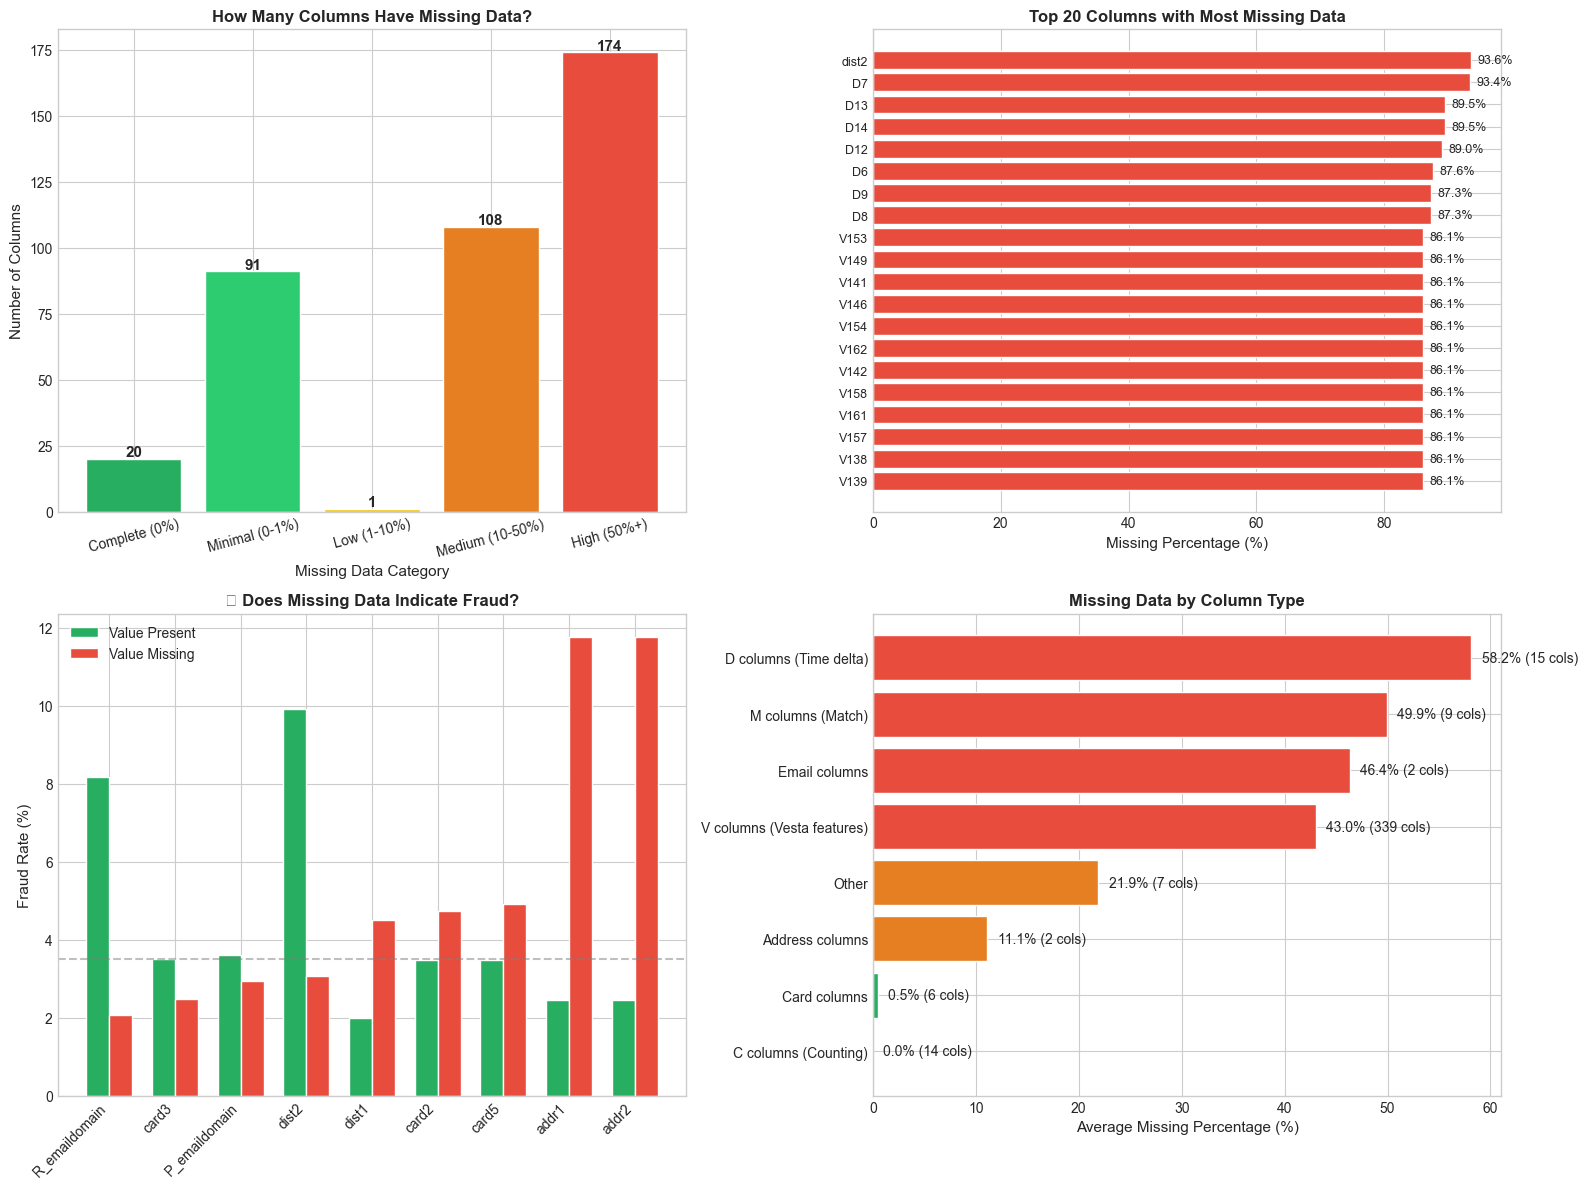


🔍 KEY FINDINGS

📊 MISSING DATA BY COLUMN TYPE:
   🔴 D columns (Time delta): 58.2% avg missing (15 columns)
   🔴 M columns (Match): 49.9% avg missing (9 columns)
   🔴 Email columns: 46.4% avg missing (2 columns)
   🔴 V columns (Vesta features): 43.0% avg missing (339 columns)
   🟡 Other: 21.9% avg missing (7 columns)
   🟡 Address columns: 11.1% avg missing (2 columns)
   🟢 Card columns: 0.5% avg missing (6 columns)
   🟢 C columns (Counting): 0.0% avg missing (14 columns)

💡 MISSING VALUES & FRAUD CORRELATION:
   R_emaildomain: ↓ LESS fraud when missing (2.1% vs 8.2%)
   card3: ↓ LESS fraud when missing (2.5% vs 3.5%)
   dist2: ↓ LESS fraud when missing (3.1% vs 9.9%)
   dist1: ↑ MORE fraud when missing (4.5% vs 2.0%)
   card2: ↑ MORE fraud when missing (4.7% vs 3.5%)
   card5: ↑ MORE fraud when missing (4.9% vs 3.5%)
   addr1: ↑ MORE fraud when missing (11.8% vs 2.5%)
   addr2: ↑ MORE fraud when missing (11.8% vs 2.5%)

💡 ACTIONABLE INSIGHTS:
   1. Many V columns have 50%+ missing data

In [7]:
# =============================================================================
# MISSING VALUES ANALYSIS
# =============================================================================

print("=" * 60)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 60)

# Calculate missing values for each column
missing = df_transaction.isnull().sum()
missing_pct = (missing / len(df_transaction)) * 100

# Create a dataframe for analysis
missing_df = pd.DataFrame({
    'column': missing.index,
    'missing_count': missing.values,
    'missing_pct': missing_pct.values
}).sort_values('missing_pct', ascending=False)

# Categorize columns by missing percentage
missing_df['category'] = pd.cut(
    missing_df['missing_pct'],
    bins=[-1, 0, 1, 10, 50, 100],
    labels=['Complete (0%)', 'Minimal (0-1%)', 'Low (1-10%)', 'Medium (10-50%)', 'High (50%+)']
)

# Summary statistics
print(f"\n📊 DATASET OVERVIEW:")
print(f"   Total rows: {len(df_transaction):,}")
print(f"   Total columns: {len(df_transaction.columns)}")

print(f"\n📊 MISSING VALUE SUMMARY:")
category_counts = missing_df['category'].value_counts()
for cat in ['Complete (0%)', 'Minimal (0-1%)', 'Low (1-10%)', 'Medium (10-50%)', 'High (50%+)']:
    count = category_counts.get(cat, 0)
    print(f"   {cat}: {count} columns")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# -----------------------------------------------------------------------------
# CHART 1: Distribution of Missing Percentages
# -----------------------------------------------------------------------------
colors_cat = {'Complete (0%)': '#27ae60', 'Minimal (0-1%)': '#2ecc71', 
              'Low (1-10%)': '#f1c40f', 'Medium (10-50%)': '#e67e22', 'High (50%+)': '#e74c3c'}

cat_counts = missing_df['category'].value_counts()
cat_order = ['Complete (0%)', 'Minimal (0-1%)', 'Low (1-10%)', 'Medium (10-50%)', 'High (50%+)']
cat_counts = cat_counts.reindex(cat_order).fillna(0)

bars = axes[0,0].bar(cat_counts.index, cat_counts.values, 
                      color=[colors_cat[c] for c in cat_counts.index], edgecolor='white')
axes[0,0].set_xlabel('Missing Data Category', fontsize=11)
axes[0,0].set_ylabel('Number of Columns', fontsize=11)
axes[0,0].set_title('How Many Columns Have Missing Data?', fontsize=12, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=15)

for bar in bars:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
                   ha='center', fontsize=11, fontweight='bold')

# -----------------------------------------------------------------------------
# CHART 2: Top 20 Columns with Most Missing Data
# -----------------------------------------------------------------------------
top_missing = missing_df[missing_df['missing_pct'] > 0].head(20)

colors = ['#e74c3c' if pct > 50 else '#e67e22' if pct > 10 else '#f1c40f' 
          for pct in top_missing['missing_pct']]

bars = axes[0,1].barh(range(len(top_missing)), top_missing['missing_pct'], color=colors, edgecolor='white')
axes[0,1].set_yticks(range(len(top_missing)))
axes[0,1].set_yticklabels(top_missing['column'], fontsize=9)
axes[0,1].set_xlabel('Missing Percentage (%)', fontsize=11)
axes[0,1].set_title('Top 20 Columns with Most Missing Data', fontsize=12, fontweight='bold')
axes[0,1].invert_yaxis()

for bar, pct in zip(bars, top_missing['missing_pct']):
    axes[0,1].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                   f'{pct:.1f}%', va='center', fontsize=9)

# -----------------------------------------------------------------------------
# CHART 3: Missing Values vs Fraud Rate
# -----------------------------------------------------------------------------
# For key columns, check if missing values correlate with fraud

key_columns = ['card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 
               'P_emaildomain', 'R_emaildomain']

missing_fraud_data = []
for col in key_columns:
    if col in df_transaction.columns:
        # Fraud rate when value is missing
        missing_mask = df_transaction[col].isnull()
        fraud_when_missing = df_transaction.loc[missing_mask, 'isFraud'].mean() * 100
        fraud_when_present = df_transaction.loc[~missing_mask, 'isFraud'].mean() * 100
        missing_pct_col = missing_mask.mean() * 100
        
        missing_fraud_data.append({
            'column': col,
            'fraud_when_missing': fraud_when_missing,
            'fraud_when_present': fraud_when_present,
            'missing_pct': missing_pct_col
        })

missing_fraud_df = pd.DataFrame(missing_fraud_data)
missing_fraud_df = missing_fraud_df.sort_values('fraud_when_missing', ascending=True)

x = range(len(missing_fraud_df))
width = 0.35

bars1 = axes[1,0].bar([i - width/2 for i in x], missing_fraud_df['fraud_when_present'], 
                       width, label='Value Present', color='#27ae60', edgecolor='white')
bars2 = axes[1,0].bar([i + width/2 for i in x], missing_fraud_df['fraud_when_missing'], 
                       width, label='Value Missing', color='#e74c3c', edgecolor='white')

axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(missing_fraud_df['column'], rotation=45, ha='right', fontsize=10)
axes[1,0].set_ylabel('Fraud Rate (%)', fontsize=11)
axes[1,0].set_title('🔍 Does Missing Data Indicate Fraud?', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].axhline(y=3.5, color='gray', linestyle='--', alpha=0.5, label='Overall avg')

# -----------------------------------------------------------------------------
# CHART 4: Column Types and Their Missing Rates
# -----------------------------------------------------------------------------
# Group columns by their prefix/type
def get_column_group(col):
    if col.startswith('V'):
        return 'V columns (Vesta features)'
    elif col.startswith('C'):
        return 'C columns (Counting)'
    elif col.startswith('D'):
        return 'D columns (Time delta)'
    elif col.startswith('M'):
        return 'M columns (Match)'
    elif col.startswith('id'):
        return 'ID columns'
    elif col.startswith('card'):
        return 'Card columns'
    elif col.startswith('addr'):
        return 'Address columns'
    elif 'email' in col.lower():
        return 'Email columns'
    else:
        return 'Other'

missing_df['group'] = missing_df['column'].apply(get_column_group)

group_missing = missing_df.groupby('group').agg(
    avg_missing=('missing_pct', 'mean'),
    num_columns=('column', 'count')
).reset_index().sort_values('avg_missing', ascending=True)

colors = ['#e74c3c' if pct > 30 else '#e67e22' if pct > 10 else '#27ae60' 
          for pct in group_missing['avg_missing']]

bars = axes[1,1].barh(group_missing['group'], group_missing['avg_missing'], color=colors, edgecolor='white')
axes[1,1].set_xlabel('Average Missing Percentage (%)', fontsize=11)
axes[1,1].set_title('Missing Data by Column Type', fontsize=12, fontweight='bold')

for bar, (_, row) in zip(bars, group_missing.iterrows()):
    axes[1,1].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                   f"{row['avg_missing']:.1f}% ({int(row['num_columns'])} cols)", 
                   va='center', fontsize=10)

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# DETAILED FINDINGS
# -----------------------------------------------------------------------------
print("\n" + "=" * 60)
print("🔍 KEY FINDINGS")
print("=" * 60)

print("\n📊 MISSING DATA BY COLUMN TYPE:")
for _, row in group_missing.sort_values('avg_missing', ascending=False).iterrows():
    risk = "🔴" if row['avg_missing'] > 30 else "🟡" if row['avg_missing'] > 10 else "🟢"
    print(f"   {risk} {row['group']}: {row['avg_missing']:.1f}% avg missing ({int(row['num_columns'])} columns)")

print("\n💡 MISSING VALUES & FRAUD CORRELATION:")
for _, row in missing_fraud_df.iterrows():
    diff = row['fraud_when_missing'] - row['fraud_when_present']
    if abs(diff) > 1:
        direction = "↑ MORE" if diff > 0 else "↓ LESS"
        print(f"   {row['column']}: {direction} fraud when missing ({row['fraud_when_missing']:.1f}% vs {row['fraud_when_present']:.1f}%)")

print("\n💡 ACTIONABLE INSIGHTS:")
print("   1. Many V columns have 50%+ missing data — consider dropping or imputing")
print("   2. Missing values CAN be a feature — 'is_missing' flags may help prediction")
print("   3. Some columns with missing data have HIGHER fraud rates when missing")
print("   4. ID columns (from identity table) have high missing — expected since not all transactions have identity info")

In [8]:
# =============================================================================
# IDENTITY TABLE ANALYSIS
# =============================================================================

print("=" * 60)
print("🔐 IDENTITY TABLE ANALYSIS")
print("=" * 60)

# First, let's understand the identity table structure
print(f"\n📊 IDENTITY TABLE OVERVIEW:")
print(f"   Rows: {len(df_identity):,}")
print(f"   Columns: {len(df_identity.columns)}")

# Show all columns
print(f"\n📋 COLUMNS IN IDENTITY TABLE:")
for i, col in enumerate(df_identity.columns):
    print(f"   {i+1}. {col}")

# Check how many transactions have identity info
print(f"\n🔗 IDENTITY COVERAGE:")
transactions_with_identity = df_transaction['TransactionID'].isin(df_identity['TransactionID']).sum()
coverage_pct = (transactions_with_identity / len(df_transaction)) * 100
print(f"   Transactions with identity info: {transactions_with_identity:,} ({coverage_pct:.1f}%)")
print(f"   Transactions without identity info: {len(df_transaction) - transactions_with_identity:,} ({100-coverage_pct:.1f}%)")

🔐 IDENTITY TABLE ANALYSIS

📊 IDENTITY TABLE OVERVIEW:
   Rows: 144,233
   Columns: 41

📋 COLUMNS IN IDENTITY TABLE:
   1. TransactionID
   2. id_01
   3. id_02
   4. id_03
   5. id_04
   6. id_05
   7. id_06
   8. id_07
   9. id_08
   10. id_09
   11. id_10
   12. id_11
   13. id_12
   14. id_13
   15. id_14
   16. id_15
   17. id_16
   18. id_17
   19. id_18
   20. id_19
   21. id_20
   22. id_21
   23. id_22
   24. id_23
   25. id_24
   26. id_25
   27. id_26
   28. id_27
   29. id_28
   30. id_29
   31. id_30
   32. id_31
   33. id_32
   34. id_33
   35. id_34
   36. id_35
   37. id_36
   38. id_37
   39. id_38
   40. DeviceType
   41. DeviceInfo

🔗 IDENTITY COVERAGE:
   Transactions with identity info: 144,233 (24.4%)
   Transactions without identity info: 446,307 (75.6%)


🔐 IDENTITY TABLE - DETAILED ANALYSIS

📊 MERGED DATA: 144,233 transactions with identity info

🔍 IDENTITY INFO & FRAUD CORRELATION:
   Fraud rate WITH identity info: 7.85%
   Fraud rate WITHOUT identity info: 2.09%
   ⚠️  Having identity info means 3.7x MORE fraud risk!


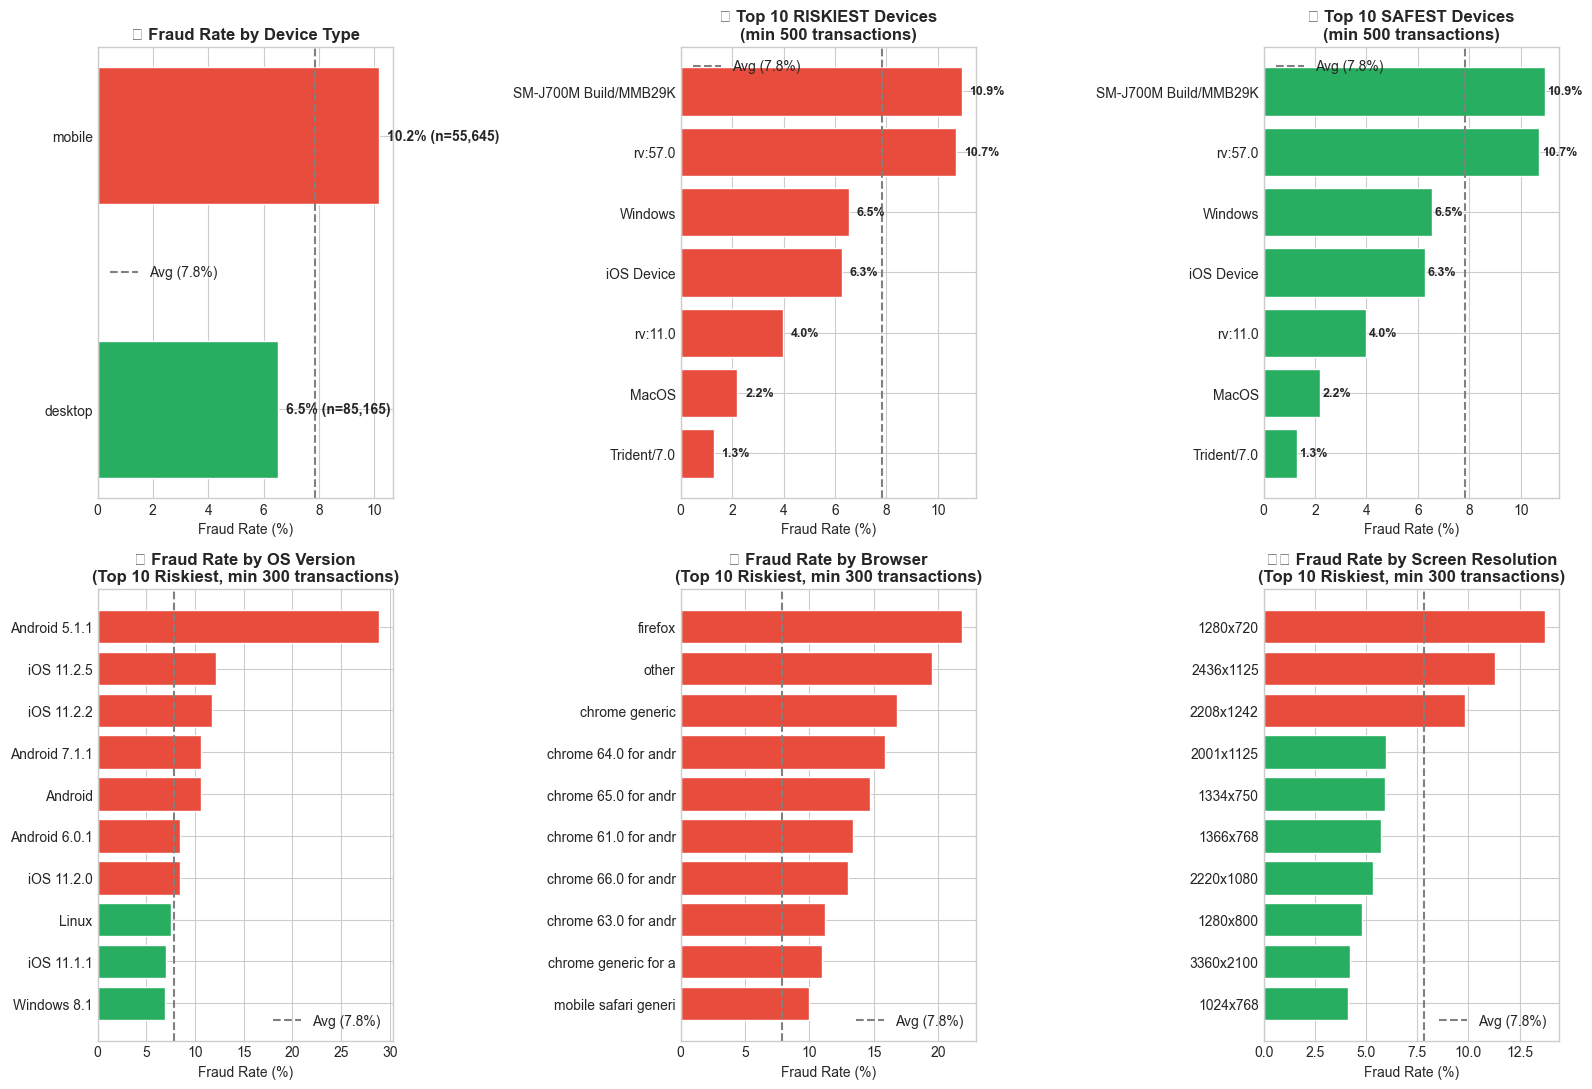


📊 KEY FINDINGS FROM IDENTITY DATA

🔍 MAJOR DISCOVERY:
   Transactions WITH identity info: 7.85% fraud
   Transactions WITHOUT identity info: 2.09% fraud
   → 'has_identity_info' is a POWERFUL feature!

📱 DEVICE TYPE:
   🔴 mobile: 10.2% fraud (55,645 transactions)
   🟢 desktop: 6.5% fraud (85,165 transactions)

🔴 RISKIEST DEVICES:
   • rv:11.0: 4.0% fraud
   • iOS Device: 6.3% fraud
   • Windows: 6.5% fraud
   • rv:57.0: 10.7% fraud
   • SM-J700M Build/MMB29K: 10.9% fraud

🟢 SAFEST DEVICES:
   • Trident/7.0: 1.3% fraud
   • MacOS: 2.2% fraud
   • rv:11.0: 4.0% fraud
   • iOS Device: 6.3% fraud
   • Windows: 6.5% fraud

💡 ACTIONABLE INSIGHTS:
   1. 'has_identity_info' = 1 means 4x more fraud risk — use as feature!
   2. Desktop vs Mobile matters — include DeviceType as feature
   3. Specific devices have very different fraud rates
   4. Browser and OS version are predictive — include in model


In [11]:
# =============================================================================
# IDENTITY TABLE - DETAILED ANALYSIS (FIXED)
# =============================================================================

print("=" * 60)
print("🔐 IDENTITY TABLE - DETAILED ANALYSIS")
print("=" * 60)

# Merge identity with transaction to get fraud labels
df_merged = df_transaction[['TransactionID', 'isFraud']].merge(
    df_identity, 
    on='TransactionID', 
    how='inner'
)

print(f"\n📊 MERGED DATA: {len(df_merged):,} transactions with identity info")

# Check if having identity info correlates with fraud
has_identity = df_transaction['TransactionID'].isin(df_identity['TransactionID'])
fraud_with_identity = df_transaction[has_identity]['isFraud'].mean() * 100
fraud_without_identity = df_transaction[~has_identity]['isFraud'].mean() * 100

print(f"\n🔍 IDENTITY INFO & FRAUD CORRELATION:")
print(f"   Fraud rate WITH identity info: {fraud_with_identity:.2f}%")
print(f"   Fraud rate WITHOUT identity info: {fraud_without_identity:.2f}%")
print(f"   ⚠️  Having identity info means {fraud_with_identity/fraud_without_identity:.1f}x MORE fraud risk!")

# -----------------------------------------------------------------------------
# VISUALIZATIONS
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 3, figsize=(16, 11))

# -----------------------------------------------------------------------------
# 1. DEVICE TYPE
# -----------------------------------------------------------------------------
device_fraud = df_merged.groupby('DeviceType').agg(
    total=('isFraud', 'count'),
    frauds=('isFraud', 'sum')
).reset_index()
device_fraud['fraud_rate'] = (device_fraud['frauds'] / device_fraud['total']) * 100
device_fraud = device_fraud.sort_values('fraud_rate', ascending=True)

colors = ['#27ae60' if rate < fraud_with_identity else '#e74c3c' for rate in device_fraud['fraud_rate']]
bars = axes[0,0].barh(device_fraud['DeviceType'].fillna('Unknown'), device_fraud['fraud_rate'], 
                      color=colors, edgecolor='white', height=0.5)
axes[0,0].axvline(x=fraud_with_identity, color='gray', linestyle='--', label=f'Avg ({fraud_with_identity:.1f}%)')
axes[0,0].set_xlabel('Fraud Rate (%)')
axes[0,0].set_title('📱 Fraud Rate by Device Type', fontweight='bold')
axes[0,0].legend()

for bar, (_, row) in zip(bars, device_fraud.iterrows()):
    axes[0,0].text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                   f"{row['fraud_rate']:.1f}% (n={int(row['total']):,})", va='center', fontsize=10, fontweight='bold')

# -----------------------------------------------------------------------------
# 2. TOP 10 RISKIEST DEVICES
# -----------------------------------------------------------------------------
device_info_fraud = df_merged.groupby('DeviceInfo').agg(
    total=('isFraud', 'count'),
    frauds=('isFraud', 'sum')
).reset_index()
device_info_fraud['fraud_rate'] = (device_info_fraud['frauds'] / device_info_fraud['total']) * 100
device_info_fraud = device_info_fraud[device_info_fraud['total'] >= 500]
device_info_top = device_info_fraud.nlargest(10, 'fraud_rate').sort_values('fraud_rate', ascending=True)

colors = ['#e74c3c' for _ in device_info_top['fraud_rate']]
bars = axes[0,1].barh(device_info_top['DeviceInfo'].fillna('Unknown').str[:25], device_info_top['fraud_rate'],
                      color=colors, edgecolor='white')
axes[0,1].axvline(x=fraud_with_identity, color='gray', linestyle='--', label=f'Avg ({fraud_with_identity:.1f}%)')
axes[0,1].set_xlabel('Fraud Rate (%)')
axes[0,1].set_title('🔴 Top 10 RISKIEST Devices\n(min 500 transactions)', fontweight='bold')
axes[0,1].legend()

for bar, (_, row) in zip(bars, device_info_top.iterrows()):
    axes[0,1].text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                   f"{row['fraud_rate']:.1f}%", va='center', fontsize=9, fontweight='bold')

# -----------------------------------------------------------------------------
# 3. TOP 10 SAFEST DEVICES
# -----------------------------------------------------------------------------
device_info_safe = device_info_fraud.nsmallest(10, 'fraud_rate').sort_values('fraud_rate', ascending=True)

colors = ['#27ae60' for _ in device_info_safe['fraud_rate']]
bars = axes[0,2].barh(device_info_safe['DeviceInfo'].fillna('Unknown').str[:25], device_info_safe['fraud_rate'],
                      color=colors, edgecolor='white')
axes[0,2].axvline(x=fraud_with_identity, color='gray', linestyle='--', label=f'Avg ({fraud_with_identity:.1f}%)')
axes[0,2].set_xlabel('Fraud Rate (%)')
axes[0,2].set_title('🟢 Top 10 SAFEST Devices\n(min 500 transactions)', fontweight='bold')
axes[0,2].legend()

for bar, (_, row) in zip(bars, device_info_safe.iterrows()):
    axes[0,2].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                   f"{row['fraud_rate']:.1f}%", va='center', fontsize=9, fontweight='bold')

# -----------------------------------------------------------------------------
# 4. OS VERSION (id_30)
# -----------------------------------------------------------------------------
if 'id_30' in df_merged.columns:
    os_fraud = df_merged.groupby('id_30').agg(
        total=('isFraud', 'count'),
        frauds=('isFraud', 'sum')
    ).reset_index()
    os_fraud['fraud_rate'] = (os_fraud['frauds'] / os_fraud['total']) * 100
    os_fraud = os_fraud[os_fraud['total'] >= 300]
    os_fraud_top = os_fraud.nlargest(10, 'fraud_rate').sort_values('fraud_rate', ascending=True)
    
    colors = ['#e74c3c' if rate > fraud_with_identity else '#27ae60' for rate in os_fraud_top['fraud_rate']]
    bars = axes[1,0].barh(os_fraud_top['id_30'].fillna('Unknown').astype(str).str[:20], os_fraud_top['fraud_rate'],
                          color=colors, edgecolor='white')
    axes[1,0].axvline(x=fraud_with_identity, color='gray', linestyle='--', label=f'Avg ({fraud_with_identity:.1f}%)')
    axes[1,0].set_xlabel('Fraud Rate (%)')
    axes[1,0].set_title('💻 Fraud Rate by OS Version\n(Top 10 Riskiest, min 300 transactions)', fontweight='bold')
    axes[1,0].legend()

# -----------------------------------------------------------------------------
# 5. BROWSER (id_31)
# -----------------------------------------------------------------------------
if 'id_31' in df_merged.columns:
    browser_fraud = df_merged.groupby('id_31').agg(
        total=('isFraud', 'count'),
        frauds=('isFraud', 'sum')
    ).reset_index()
    browser_fraud['fraud_rate'] = (browser_fraud['frauds'] / browser_fraud['total']) * 100
    browser_fraud = browser_fraud[browser_fraud['total'] >= 300]
    browser_fraud_top = browser_fraud.nlargest(10, 'fraud_rate').sort_values('fraud_rate', ascending=True)
    
    colors = ['#e74c3c' if rate > fraud_with_identity else '#27ae60' for rate in browser_fraud_top['fraud_rate']]
    bars = axes[1,1].barh(browser_fraud_top['id_31'].fillna('Unknown').astype(str).str[:20], browser_fraud_top['fraud_rate'],
                          color=colors, edgecolor='white')
    axes[1,1].axvline(x=fraud_with_identity, color='gray', linestyle='--', label=f'Avg ({fraud_with_identity:.1f}%)')
    axes[1,1].set_xlabel('Fraud Rate (%)')
    axes[1,1].set_title('🌐 Fraud Rate by Browser\n(Top 10 Riskiest, min 300 transactions)', fontweight='bold')
    axes[1,1].legend()

# -----------------------------------------------------------------------------
# 6. SCREEN RESOLUTION (id_33)
# -----------------------------------------------------------------------------
if 'id_33' in df_merged.columns:
    screen_fraud = df_merged.groupby('id_33').agg(
        total=('isFraud', 'count'),
        frauds=('isFraud', 'sum')
    ).reset_index()
    screen_fraud['fraud_rate'] = (screen_fraud['frauds'] / screen_fraud['total']) * 100
    screen_fraud = screen_fraud[screen_fraud['total'] >= 300]
    screen_fraud_top = screen_fraud.nlargest(10, 'fraud_rate').sort_values('fraud_rate', ascending=True)
    
    colors = ['#e74c3c' if rate > fraud_with_identity else '#27ae60' for rate in screen_fraud_top['fraud_rate']]
    bars = axes[1,2].barh(screen_fraud_top['id_33'].fillna('Unknown').astype(str).str[:20], screen_fraud_top['fraud_rate'],
                          color=colors, edgecolor='white')
    axes[1,2].axvline(x=fraud_with_identity, color='gray', linestyle='--', label=f'Avg ({fraud_with_identity:.1f}%)')
    axes[1,2].set_xlabel('Fraud Rate (%)')
    axes[1,2].set_title('🖥️ Fraud Rate by Screen Resolution\n(Top 10 Riskiest, min 300 transactions)', fontweight='bold')
    axes[1,2].legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# SUMMARY
# -----------------------------------------------------------------------------
print("\n" + "=" * 60)
print("📊 KEY FINDINGS FROM IDENTITY DATA")
print("=" * 60)

print(f"\n🔍 MAJOR DISCOVERY:")
print(f"   Transactions WITH identity info: {fraud_with_identity:.2f}% fraud")
print(f"   Transactions WITHOUT identity info: {fraud_without_identity:.2f}% fraud")
print(f"   → 'has_identity_info' is a POWERFUL feature!")

print(f"\n📱 DEVICE TYPE:")
for _, row in device_fraud.sort_values('fraud_rate', ascending=False).iterrows():
    risk = "🔴" if row['fraud_rate'] > fraud_with_identity else "🟢"
    print(f"   {risk} {row['DeviceType']}: {row['fraud_rate']:.1f}% fraud ({int(row['total']):,} transactions)")

print(f"\n🔴 RISKIEST DEVICES:")
for _, row in device_info_top.tail(5).iterrows():
    print(f"   • {row['DeviceInfo']}: {row['fraud_rate']:.1f}% fraud")

print(f"\n🟢 SAFEST DEVICES:")
for _, row in device_info_safe.head(5).iterrows():
    print(f"   • {row['DeviceInfo']}: {row['fraud_rate']:.1f}% fraud")

print("\n💡 ACTIONABLE INSIGHTS:")
print("   1. 'has_identity_info' = 1 means 4x more fraud risk — use as feature!")
print("   2. Desktop vs Mobile matters — include DeviceType as feature")
print("   3. Specific devices have very different fraud rates")
print("   4. Browser and OS version are predictive — include in model")